In [1]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib import cm
import seaborn as sns
import numpy as np
from scipy import stats
import networkx as nx
import datetime as dt
import random
import pickle
import math
import csv
import os

%matplotlib inline

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Visualizations & plots

In [2]:
home_dir = os.path.expanduser("~")
code_dir = os.path.join(home_dir,"Developer","GitHub","endogenous-growth")
nets_dir = os.path.join(code_dir,"networks")
figs_dir = os.path.join(code_dir,"figures")

In [3]:
from models import InOneOutOne_Strategic
from utils import get_distribution

In [4]:
m = 3
alpha = 0.95

# READY OUTPUT DIRECTORY
output = "_".join(["i1o1","m"+str(m),"a"+str(alpha)])
if not os.path.exists(os.path.join(figs_dir,output)):
    os.mkdir(os.path.join(figs_dir,output))

### Node dyanmics

In [5]:
# DISTRIBUTIONS
runs = list(range(44))
gammas = [0,1,2,3,4,5,6,7,8,9,"inf"]

PRs = {}
for gamma in gammas:
    PRs[gamma] = []
    for run in runs:    
        network = "_".join(["i1o1","m"+str(m),"a"+str(alpha),"g"+str(gamma)])

        # LOAD RUN
        try:
            with open(os.path.join(nets_dir,network,"run_"+str(run)+'.pkl'), 'rb') as f:
                model = pickle.load(f)
        except:
            continue

        # Get the PageRanks of the nodes at step 100
        PR = nx.get_node_attributes(model.networks[-1], "score")

        # Save it
        PRs[gamma].append(PR)

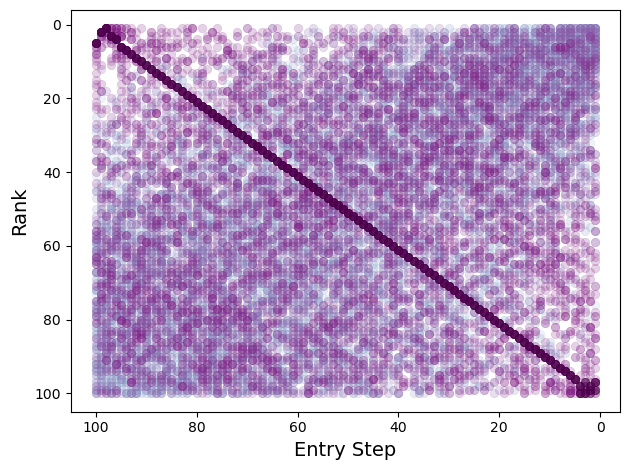

In [6]:
plot_gammas = [0,2,4,8,"inf"]

# Create a colorbar
cmap = plt.colormaps['BuPu'] 
colors = [cmap(i) for i in np.linspace(0.333, 1, len(plot_gammas))]

# Create the figure
fig, ax = plt.subplots()

# Plot the scatterplots
for i, gamma in enumerate(plot_gammas):
    color = colors[i]
    for PR in PRs[gamma]:
        # get the rank of the nodes, starting from one
        PR_ranksort = sorted(PR.items(), key=lambda x: x[1], reverse=True)
        ranks = {node: rank for rank, (node, score) in enumerate(PR_ranksort, start=1)}
        # get the entry time of the nodes, starting from one
        PR_nodesort = sorted(PR.items(), key=lambda x: x[0])        
        entry = {node: entry for entry, (node, score) in enumerate(PR_nodesort, start=1)}
        # turn these into lists
        x_pts = [entry[node] for node in PR]
        y_pts = [ranks[node] for node in PR]
        # plot scatterplots
        plot = ax.scatter(x_pts, y_pts, color = color, lw = 0.5, alpha = 0.2)

# Plot the overall distributions
#for i, gamma in enumerate(plot_gammas):
#    color = colors[i]    
#    # get combined PDF
#    x_pdf, y_pdf = get_distribution([item for sublist in Vs[gamma] for item in sublist], number_of_bins = 11)
#    # plot combined PDF
#    label = f'$\\gamma = ${gamma}' if gamma != "inf" else f'$\\gamma \\to \\infty$'
#    plot = plt.loglog(x_pdf, y_pdf, color = color, marker = "s",
#                    lw = 1.5, label=label)

# labels
ax.set_xlabel("Entry Step", fontsize = 14)
ax.set_ylabel("Rank", fontsize = 14)
ax.invert_xaxis()
ax.invert_yaxis()
#plt.legend(loc='upper right',frameon=False, fontsize=14)
# save
plt.savefig(os.path.join(figs_dir,output,"node-dynamics.jpeg"))
plt.savefig(os.path.join(figs_dir,output,"node-dynamics.pdf"))
plt.tight_layout()
plt.show()

/Users/carolina/Developer/anaconda3/envs/growth/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/carolina/Developer/anaconda3/envs/growth/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/carolina/Developer/anaconda3/envs/growth/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/carolina/Developer/anaconda3/envs/growth/lib/python3.11/site-packages/seaborn/_oldcore.py:111

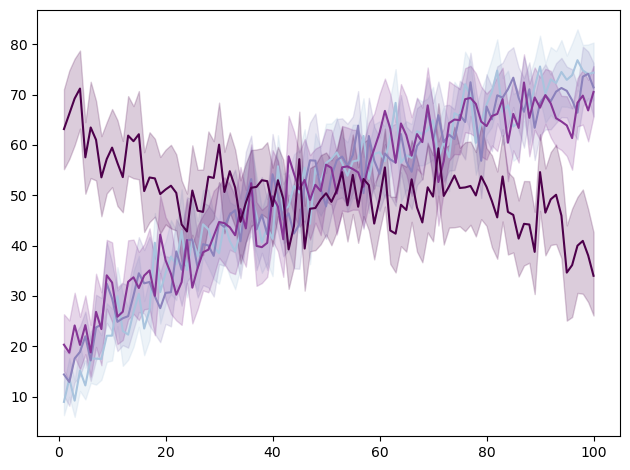

In [11]:
plot_gammas = [0,2,4,8]

# Create a colorbar
cmap = plt.colormaps['BuPu'] 
colors = [cmap(i) for i in np.linspace(0.333, 1, len(plot_gammas))]

# Create the figure
#fig, ax = plt.subplots()

# Plot the scatterplots
for i, gamma in enumerate(plot_gammas):
    color = colors[i]
    x_pts = []
    y_pts = []
    for PR in PRs[gamma]:
        # get the rank of the nodes, starting from one
        PR_ranksort = sorted(PR.items(), key=lambda x: x[1], reverse=True)
        ranks = {node: rank for rank, (node, score) in enumerate(PR_ranksort, start=1)}
        # get the entry time of the nodes, starting from one
        PR_nodesort = sorted(PR.items(), key=lambda x: x[0])        
        entry = {node: entry for entry, (node, score) in enumerate(PR_nodesort, start=1)}
        # turn these into lists
        x_pts.extend([entry[node] for node in PR])
        y_pts.extend([ranks[node] for node in PR])
        # plot scatterplots
        #plot = ax.scatter(x_pts, y_pts, color = color, lw = 0.5, alpha = 0.2)
    sns.lineplot(x=x_pts, y=y_pts, color=color)
        
# Plot the overall distributions
#for i, gamma in enumerate(plot_gammas):
#    color = colors[i]    
#    # get combined PDF
#    x_pdf, y_pdf = get_distribution([item for sublist in Vs[gamma] for item in sublist], number_of_bins = 11)
#    # plot combined PDF
#    label = f'$\\gamma = ${gamma}' if gamma != "inf" else f'$\\gamma \\to \\infty$'
#    plot = plt.loglog(x_pdf, y_pdf, color = color, marker = "s",
#                    lw = 1.5, label=label)

# labels
ax.set_xlabel("Entry Step", fontsize = 14)
ax.set_ylabel("Rank", fontsize = 14)
ax.invert_xaxis()
ax.invert_yaxis()
#plt.legend(loc='upper right',frameon=False, fontsize=14)
# save
plt.savefig(os.path.join(figs_dir,output,"node-dynamics.jpeg"))
plt.savefig(os.path.join(figs_dir,output,"node-dynamics.pdf"))
plt.tight_layout()
plt.show()

### Path dependence -- examples

In [14]:
# DISTRIBUTIONS
examples = []
examples.append({'gamma':8, 'run':-1, 'n_i':48})
examples.append({'gamma':8, 'run':1, 'n_i':56})
examples.append({'gamma':8, 'run':5, 'n_i':77})
examples.append({'gamma':8, 'run':8, 'n_i':94})
examples.append({'gamma':8, 'run':4, 'n_i':45})
examples.append({'gamma':7, 'run':2, 'n_i':46})

m = 3
alpha = 0.95

around = 5

Vs = {}
Ss = {}
for example in examples:

    network = "_".join(["i1o1","m"+str(m),"a"+str(alpha),"g"+str(example["gamma"])])
    example["label"] = "_".join([network,"r"+str(example["run"])])

    # LOAD RUN
    with open(os.path.join(nets_dir,network,"run_"+str(example['run'])+'.pkl'), 'rb') as f:
        model = pickle.load(f)
        model.specs["alpha"] = alpha

    Vs[example["label"]] = {}
    Ss[example["label"]] = {}
    for term in ["pre","post"]:
        n_i = example["n_i"]
        idxs = list(range(n_i-around,n_i)) if term == "pre" else list(range(n_i,n_i+around))
        Vs[example["label"]][term] = []
        Ss[example["label"]][term] = []
        for idx in idxs:
            # subgraph based off of the absolute vertex index, no? we'll find out soon enough
            nodes = list(model.networks[idx].nodes)
            node = max(nodes)
            G_n_i = model.G.subgraph(range(1,node))
            # now explore the subgraph... it'd be nice to have a version of explore() that takes a subgraph as an argument
            tmp = InOneOutOne_Strategic(m=m,alpha=alpha,gamma=example["gamma"])
            tmp.G = G_n_i
            tmp.nodes = model.networks[n_i-1].nodes-{node}
            V = tmp.explore()
            Vs[example["label"]][term].append(list(V.values()))
            # record also the sampled values
            Ss[example["label"]][term].append(model.score(model.networks[idx])[node])
            del tmp

In [15]:
# Grab colors matching the examples
from matplotlib.colors import rgb2hex
color = {}
for term, cmap_name in zip(["pre","post"],["Blues","BuPu"]):
    cmap = plt.colormaps[cmap_name]
    color[term] = rgb2hex([cmap(i) for i in np.linspace(0, 0.8, 10)][-1])

/var/folders/fn/4rfy1s810gz21m_6gc77r7fh0000gn/T/ipykernel_74974/947252654.py:18: RuntimeWarning: divide by zero encountered in log10
  log_y = np.interp(np.log10(S), np.log10(x_pdf), np.log10(y_pdf))


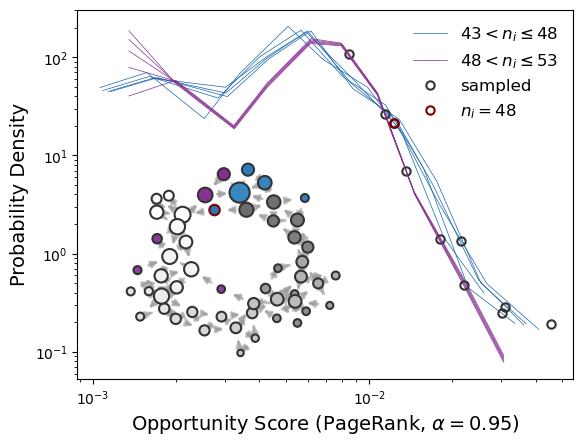

/var/folders/fn/4rfy1s810gz21m_6gc77r7fh0000gn/T/ipykernel_74974/947252654.py:18: RuntimeWarning: divide by zero encountered in log10
  log_y = np.interp(np.log10(S), np.log10(x_pdf), np.log10(y_pdf))


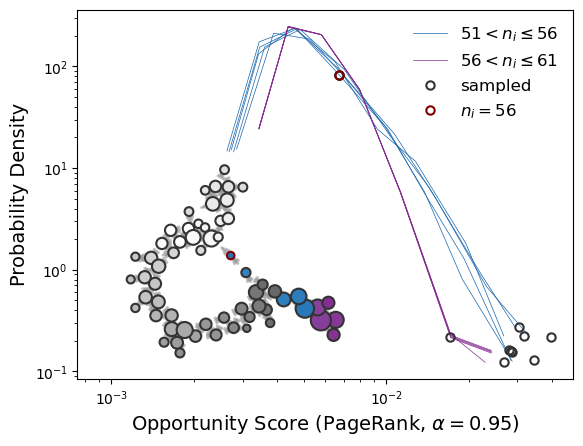

/var/folders/fn/4rfy1s810gz21m_6gc77r7fh0000gn/T/ipykernel_74974/947252654.py:18: RuntimeWarning: divide by zero encountered in log10
  log_y = np.interp(np.log10(S), np.log10(x_pdf), np.log10(y_pdf))


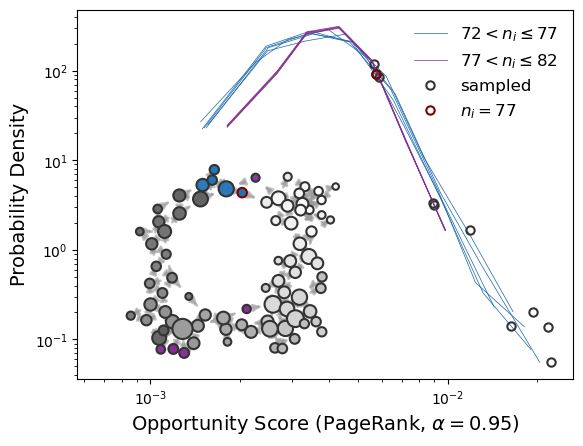

/var/folders/fn/4rfy1s810gz21m_6gc77r7fh0000gn/T/ipykernel_74974/947252654.py:18: RuntimeWarning: divide by zero encountered in log10
  log_y = np.interp(np.log10(S), np.log10(x_pdf), np.log10(y_pdf))


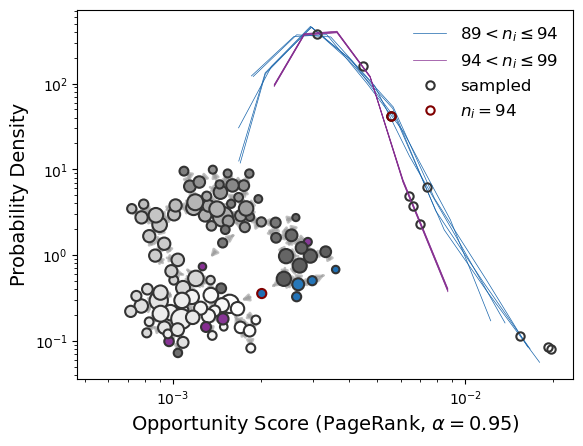

/var/folders/fn/4rfy1s810gz21m_6gc77r7fh0000gn/T/ipykernel_74974/947252654.py:18: RuntimeWarning: divide by zero encountered in log10
  log_y = np.interp(np.log10(S), np.log10(x_pdf), np.log10(y_pdf))


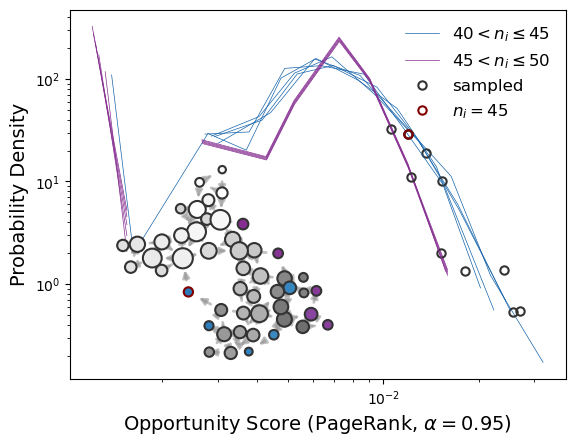

/var/folders/fn/4rfy1s810gz21m_6gc77r7fh0000gn/T/ipykernel_74974/947252654.py:18: RuntimeWarning: divide by zero encountered in log10
  log_y = np.interp(np.log10(S), np.log10(x_pdf), np.log10(y_pdf))


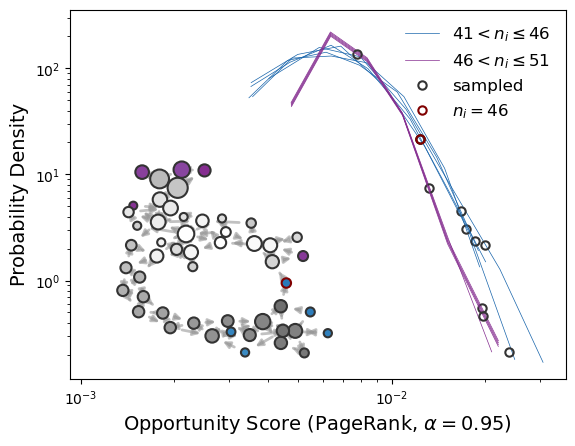

In [16]:
for example in examples:
    
    n_i = example["n_i"]

    fig, ax = plt.subplots()

    # Plot the overall distributions
    for term in Vs[example['label']]:
        n_min = n_i-around if term == "pre" else n_i
        n_max = n_i if term == "pre" else n_i+around
        # Plot
        first = True
        for V, S in zip(Vs[example['label']][term],Ss[example['label']][term]):
            x_pdf, y_pdf = get_distribution(V, number_of_bins = 10)
            ax.loglog(x_pdf, y_pdf, color = color[term], lw = 0.5,
                      label=f'${n_min} < n_i \\leq {n_max}$' if first else None)
            # Interpolate the sampled value on the log scale
            log_y = np.interp(np.log10(S), np.log10(x_pdf), np.log10(y_pdf))
            ax.plot(S,10**log_y,'o',color='#333333',fillstyle="none", markersize=6, markeredgewidth=1.5)
            first = False
        if term == "pre":
            S_i = S
            y_i = 10**log_y
        # plot the one for the legend
        #x_pdf, y_pdf = get_distribution([item for sublist in Vs[example['label']][term] for item in sublist], number_of_bins = 10)
        # plot combined PDF
        #plot = ax.loglog(x_pdf, y_pdf, color = color[term], lw = 1.5, 
        #                 label=f'${n_min} < n_i \\leq {n_max}$')
    # plot the key sampled value
    ax.plot(S_i,y_i,'o',color='#333333',fillstyle="none", markersize=6, markeredgewidth=1.5, label=f'sampled')
    ax.plot(S_i,y_i,'o',color='#800000',fillstyle="none", markersize=6, markeredgewidth=1.5, label=f'$n_i = ${n_i}')

    # import the example's network
    with open(os.path.join(figs_dir,output,"examples",f"{example['label']}.pickle"), 'rb') as f:
        G, pos, pr_rel, colors, borders = pickle.load(f)

    # initialize inset figure
    ax_inset = inset_axes(ax, width="50%", height="60%", loc='lower left',
                      bbox_to_anchor=(0.05, 0.0, 1.0, 1.0), bbox_transform=ax.transAxes)

    # draw network
    nx.draw_networkx_nodes(G, pos, node_size=pr_rel, node_color=colors, linewidths=1.5,
                        edgecolors=borders, ax=ax_inset)
    nx.draw_networkx_edges(G, pos, edge_color='#999999', ax=ax_inset, width=2, alpha=0.6)
    ax_inset.set_axis_off()

    # labels
    ax.set_xlabel("Opportunity Score (PageRank, "+f'$\\alpha={alpha}$'+")", fontsize = 14)
    ax.set_ylabel("Probability Density", fontsize = 14);
    ax.legend(loc="upper right",frameon=False, fontsize=12)
    # save
    plt.savefig(os.path.join(figs_dir,output,"examples",f"{example['label']}_example.pdf"))
    plt.savefig(os.path.join(figs_dir,output,"examples",f"{example['label']}_example.jpeg"))
    plt.show()